Simplex query for Peacocks.
Derived from matlab code: poly_query_peacock.mlx

In [13]:
import pathlib
from sisap2023.utils.mirflickr import load_encodings
from sisap2023.utils.distances import l1_norm, relu

smData = load_encodings(pathlib.Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_encodings(pathlib.Path("/Volumes/Data/mf_dino2")) # load encodings

allData = relu(allData)
allData = l1_norm(allData)

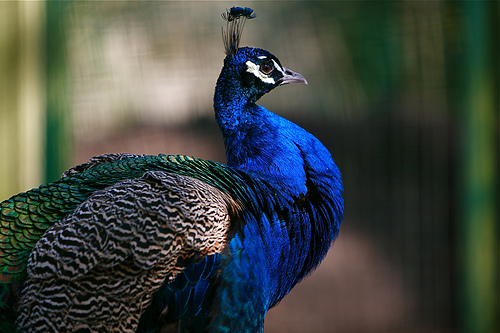

In [14]:
# Get the peacock at index 

from sisap2023.utils.mirflickr import get_mf_image

q0 = 101102 # a peacock

get_mf_image(q0)

In [15]:
from sisap2023.metrics.euc import euc

def getDists(query_index,allData):
    '''Return the distances from the query to allData'''
    '''Returns an array same dimension as allData of scalars'''
    mf_query_data = allData[query_index]
    distances = euc(mf_query_data, allData)
    return distances

In [16]:
from matplotlib import pyplot as plt

def imShow( image ):
    # plt.title(Image title")
    #plt.xlabel("X pixel scaling")
    # plt.ylabel("Y pixels scaling")

    fig = plt.figure(figsize = (1,1)) # in inches!
    plt.axis('off')
    plt.imshow(image) # figsize=(640/80,640/80), dpi=80)
    plt.show()

In [17]:
import numpy as np

dists = getDists(q0,allData)
closest_indices = np.argsort(dists) # the closest images to the query
poly_query_indexes = closest_indices[0:6] # These are the indices we will use for the poly query
best_100_for_one = closest_indices[0:100]

In [18]:
from sisap2023.utils.count_cats import get_best_cats_in_subset

peacock_category = 84

best_100_categorical = get_best_cats_in_subset(peacock_category,best_100_for_one,smData)


In [19]:

print(dists[closest_indices[0:20]])
print(closest_indices[1]) # first index that is not the query

[0.         0.04411472 0.04448935 0.0467945  0.04839471 0.04863692
 0.04878569 0.0498939  0.05065704 0.05083976 0.05112579 0.05177553
 0.05276643 0.05341126 0.05377891 0.05575816 0.05607713 0.05618041
 0.05618837 0.05639655]
692655


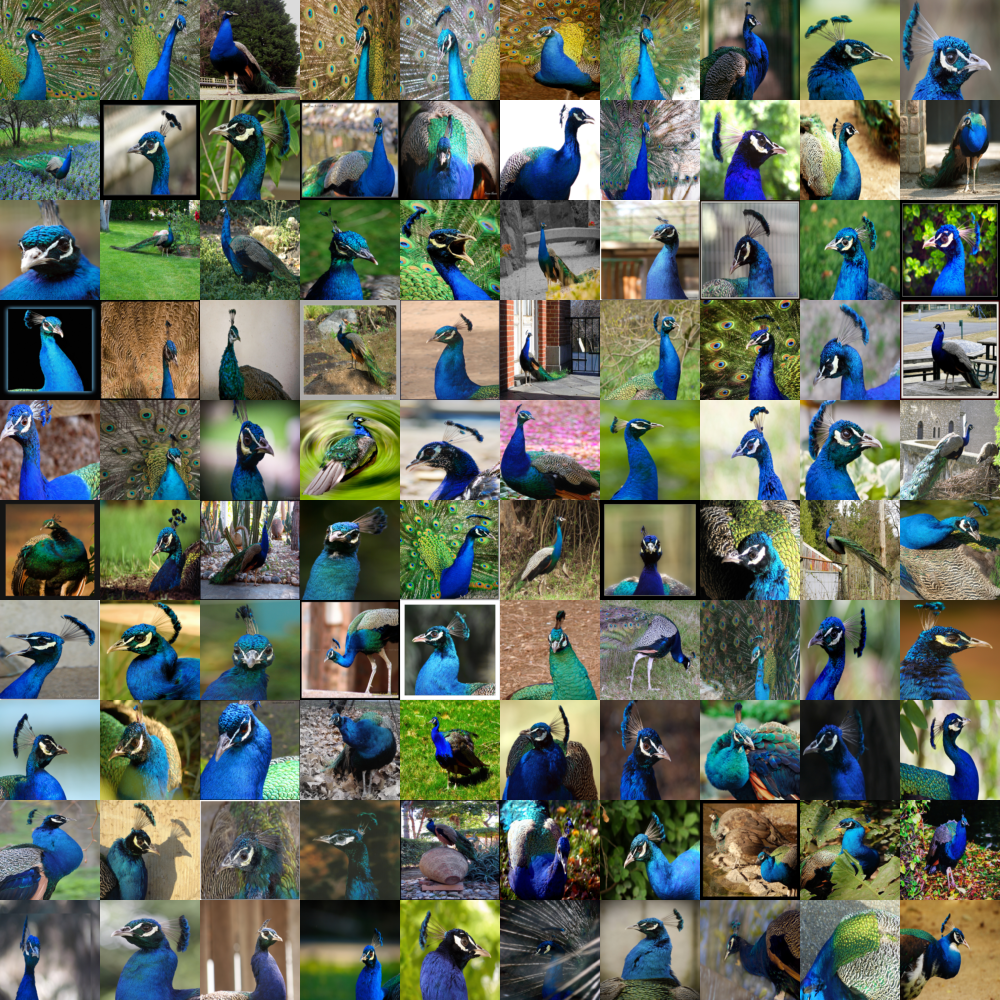

In [20]:
# These are the best images best on lowest average distance from the queries

from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_categorical,10,10,100,100)

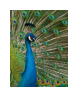

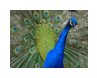

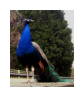

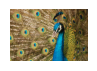

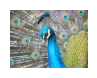

In [21]:


for i in range(0,5): # 0 is the original image
    imShow(get_mf_image(best_100_categorical[i]))

In [22]:
from sisap2023.metrics.msed_class import MSED
import numpy as np

poly_query_indexes = best_100_categorical[0:5] # These are the indices we will use for the poly query
base_data = allData[poly_query_indexes]

base = MSED(base_data)  # form the base simplex 

complexities = base.query(allData)

[1.0000002  0.9999998  0.99999994 0.9999995  0.9999996 ]


In [23]:
complexities = complexities.flatten()   # reshape the data to a row
indices = np.argsort(complexities)      # lowest is first
best_100_for_msed = indices[0:100]

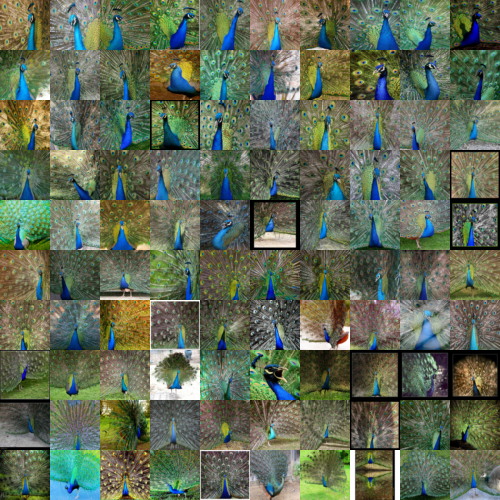

In [24]:

make_mf_image_grid(best_100_for_msed,10,10,50,50)

In [25]:
# Now want to report results the total count in the category

from sisap2023.utils.count_cats import count_number_in_results_in_cat

encodings_for_best_100_single = smData[best_100_for_one] # the alexnet encodings for the best 100 average singlequery images
single_peacock_totals = encodings_for_best_100_single[:,peacock_category]
print("Total peacock sum for single query best 100: ", np.sum(single_peacock_totals))


encodings_for_best_100_average = smData[best_100_for_msed] # the alexnet encodings for the best 100 polyquery images
average_peacock_totals = encodings_for_best_100_average[:,peacock_category]
print("Total peacock sum for poly query best 100: ", np.sum(average_peacock_totals))

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_for_one,smData)
print("Total with thresh better than 0.9 single query : ", res)

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_for_msed,smData)
print("Total with thresh better than 0.9 poly query : ", res)

Total peacock sum for single query best 100:  98.9698
Total peacock sum for poly query best 100:  99.576385
Total with thresh better than 0.9 single query :  98
Total with thresh better than 0.9 poly query :  98
